In [ ]:
# Artificial Neural Network
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from keras.callbacks import EarlyStopping

%matplotlib inline
# Importing Data file
data = pd.read_csv('employee_attrition_test.csv')
X = data.iloc[:, :-1].values 
y = data.iloc[:, 21].values

dataset = pd.DataFrame(data)

In [ ]:
"""
count=0
for i in range(0,34):
  print(X[i])
  print("\n")
  count+=1
print(count) 
""" 

'\ncount=0\nfor i in range(0,34):\n  print(X[i])\n  print("\n")\n  count+=1\nprint(count) \n'

In [ ]:
#Dataset Before Preprocessing

dataset.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7


In [ ]:
# Handling Null Values With Imputation (Constant value = 0)
# Handel Null Values of "Age" ,"BusinessTravel" ,"DailyRate" ,"DistanceFromHome" ,"MaritalStatus" columns
#using imputation in the same column

data['Age'].fillna(value=0 ,inplace=True)
data['BusinessTravel'].fillna(value=0 ,inplace=True)
data['DailyRate'].fillna(value=0 ,inplace=True)
data['DistanceFromHome'].fillna(value=0 ,inplace=True)
data['MaritalStatus'].fillna(value=0 ,inplace=True)

In [ ]:
dataset

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,Travel_Rarely,866.0,Sales,0.0,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,0.0,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,1,1477,4,Male,54,3,2,Sales Executive,1,Married,4373,17456,0,Y,No,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,1,449,3,Male,73,3,2,Sales Executive,2,Married,6349,22107,0,Y,Yes,13,3,4,80,1,6,0,3,5,4,1,4
438,0.0,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,440,1,Male,84,1,1,Research Scientist,4,Married,3464,24737,5,Y,Yes,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,1,909,4,Female,42,2,2,Human Resources,4,Married,5204,7790,8,Y,No,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
# Encoding categorical data
# Label Encoding the "Gender","Department","EducationField","JobRole" ,"Over18","OverTime" Columns
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()

data['Department']=l1.fit_transform(dataset['Department'])
data['EducationField']=l1.fit_transform(dataset['EducationField'])
data['Gender']=l1.fit_transform(dataset['Gender'])
data['JobRole']=l1.fit_transform(dataset['JobRole'])
data['Over18']=l1.fit_transform(dataset['Over18'])
data['OverTime']=l1.fit_transform(dataset['OverTime'])

In [ ]:
pd.DataFrame(data)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,Travel_Rarely,866.0,2,0.0,3,3,1,1469,4,1,84,3,2,7,1,Single,8463,23490,0,0,0,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,1,13.0,2,3,1,250,4,0,57,4,2,4,1,Divorced,4450,26250,1,0,0,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,0,22.0,1,0,1,1714,4,1,58,1,1,1,3,Married,1555,11585,1,0,0,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,1,7.0,3,1,1,86,2,1,59,3,3,6,1,Divorced,9724,18787,2,0,0,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,1,0.0,2,1,1,304,4,1,62,3,2,2,2,Single,5914,9945,8,0,0,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,2,7.0,3,3,1,1477,4,1,54,3,2,7,1,Married,4373,17456,0,0,0,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,2,1.0,1,2,1,449,3,1,73,3,2,7,2,Married,6349,22107,0,0,1,13,3,4,80,1,6,0,3,5,4,1,4
438,0.0,Travel_Rarely,1157.0,1,2.0,4,3,1,440,1,1,84,1,1,6,4,Married,3464,24737,5,0,1,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,Travel_Rarely,1383.0,0,2.0,3,1,1,909,4,0,42,2,2,1,4,Married,5204,7790,8,0,0,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
data.shape

(441, 34)

In [ ]:
# Encoding categorical data
# Mapping Encoding The "MaritalStatus" ,"BusinessTravel" Columns

data['MaritalStatus']=data['MaritalStatus'].replace('0',0)
data['MaritalStatus']=data['MaritalStatus'].replace('Single',1)
data['MaritalStatus']=data['MaritalStatus'].replace('Divorced',2)
data['MaritalStatus']=data['MaritalStatus'].replace('Married',3)

data['BusinessTravel']=data['BusinessTravel'].replace('0',0)
data['BusinessTravel']=data['BusinessTravel'].replace('Travel_Rarely',1)
data['BusinessTravel']=data['BusinessTravel'].replace('Non-Travel',2)
data['BusinessTravel']=data['BusinessTravel'].replace('Travel_Frequently',3)

pd.DataFrame(data)



,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,1,866.0,2,0.0,3,3,1,1469,4,1,84,3,2,7,1,1,8463,23490,0,0,0,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,1,1084.0,1,13.0,2,3,1,250,4,0,57,4,2,4,1,2,4450,26250,1,0,0,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,1,240.0,0,22.0,1,0,1,1714,4,1,58,1,1,1,3,3,1555,11585,1,0,0,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,1,1339.0,1,7.0,3,1,1,86,2,1,59,3,3,6,1,2,9724,18787,2,0,0,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,1,1396.0,1,0.0,2,1,1,304,4,1,62,3,2,2,2,1,5914,9945,8,0,0,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,3,430.0,2,7.0,3,3,1,1477,4,1,54,3,2,7,1,3,4373,17456,0,0,0,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,2,210.0,2,1.0,1,2,1,449,3,1,73,3,2,7,2,3,6349,22107,0,0,1,13,3,4,80,1,6,0,3,5,4,1,4
438,0.0,1,1157.0,1,2.0,4,3,1,440,1,1,84,1,1,6,4,3,3464,24737,5,0,1,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,1,1383.0,0,2.0,3,1,1,909,4,0,42,2,2,1,4,3,5204,7790,8,0,0,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       441 non-null    float64
 1   BusinessTravel            441 non-null    int64  
 2   DailyRate                 441 non-null    float64
 3   Department                441 non-null    int64  
 4   DistanceFromHome          441 non-null    float64
 5   Education                 441 non-null    int64  
 6   EducationField            441 non-null    int64  
 7   EmployeeCount             441 non-null    int64  
 8   EmployeeNumber            441 non-null    int64  
 9   EnvironmentSatisfaction   441 non-null    int64  
 10  Gender                    441 non-null    int64  
 11  HourlyRate                441 non-null    int64  
 12  JobInvolvement            441 non-null    int64  
 13  JobLevel                  441 non-null    int64  
 14  JobRole   

In [ ]:
dataset.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.0,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.0,441.000000,441.000000,441.000000,441.000000,441.0,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,33.260771,1.446712,775.532880,1.258503,8.301587,2.961451,2.267574,1.0,1026.027211,2.811791,0.600907,64.049887,2.768707,2.111111,4.358277,2.766440,2.083900,6626.911565,14458.875283,2.786848,0.0,0.267574,15.090703,3.140590,2.764172,80.0,0.727891,11.473923,2.839002,2.791383,7.160998,4.260771,2.346939,4.396825
std,15.041383,0.787686,413.934316,0.536255,8.217344,0.951488,1.380404,0.0,592.604321,1.080171,0.490268,19.889176,0.714156,1.078251,2.481473,1.116959,0.894295,4502.365159,7191.042106,2.474398,0.0,0.443197,3.647655,0.347992,1.088654,0.0,0.793936,7.603819,1.303465,0.727398,6.264541,3.542922,3.471939,3.661705
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,14.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1051.000000,2104.000000,0.000000,0.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,441.000000,1.000000,1.000000,2.000000,1.000000,1.0,485.000000,2.000000,0.000000,47.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3452.000000,8751.000000,1.000000,0.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,1.000000,783.000000,1.000000,7.000000,3.000000,2.000000,1.0,1024.000000,3.000000,1.000000,63.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5324.000000,14168.000000,2.000000,0.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,2.000000,1130.000000,2.000000,13.000000,4.000000,3.000000,1.0,1557.000000,4.000000,1.000000,81.000000,3.000000,3.000000,7.000000,4.000000,3.000000,8008.000000,20943.000000,4.000000,0.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,3.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2065.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,3.000000,19740.000000,26959.000000,9.000000,0.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:

data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,1,866.0,2,0.0,3,3,1,1469,4,1,84,3,2,7,1,1,8463,23490,0,0,0,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,1,1084.0,1,13.0,2,3,1,250,4,0,57,4,2,4,1,2,4450,26250,1,0,0,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,1,240.0,0,22.0,1,0,1,1714,4,1,58,1,1,1,3,3,1555,11585,1,0,0,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,1,1339.0,1,7.0,3,1,1,86,2,1,59,3,3,6,1,2,9724,18787,2,0,0,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,1,1396.0,1,0.0,2,1,1,304,4,1,62,3,2,2,2,1,5914,9945,8,0,0,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,3,430.0,2,7.0,3,3,1,1477,4,1,54,3,2,7,1,3,4373,17456,0,0,0,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,2,210.0,2,1.0,1,2,1,449,3,1,73,3,2,7,2,3,6349,22107,0,0,1,13,3,4,80,1,6,0,3,5,4,1,4
438,0.0,1,1157.0,1,2.0,4,3,1,440,1,1,84,1,1,6,4,3,3464,24737,5,0,1,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,1,1383.0,0,2.0,3,1,1,909,4,0,42,2,2,1,4,3,5204,7790,8,0,0,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
X= data.iloc[:, :-1].values
y= data.iloc[:, 21].values


In [ ]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#data=data[['DailyRate','EmployeeNumber','MonthlyIncome','MonthlyRate','HourlyRate']]
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)
print('\n')
print(Q1)
print('\n')
print(Q3)


Age                            13.0
BusinessTravel                  1.0
DailyRate                     689.0
Department                      1.0
DistanceFromHome               12.0
Education                       2.0
EducationField                  2.0
EmployeeCount                   0.0
EmployeeNumber               1072.0
EnvironmentSatisfaction         2.0
Gender                          1.0
HourlyRate                     34.0
JobInvolvement                  1.0
JobLevel                        2.0
JobRole                         5.0
JobSatisfaction                 2.0
MaritalStatus                   2.0
MonthlyIncome                4556.0
MonthlyRate                 12192.0
NumCompaniesWorked              3.0
Over18                          0.0
OverTime                        1.0
PercentSalaryHike               6.0
PerformanceRating               0.0
RelationshipSatisfaction        2.0
StandardHours                   0.0
StockOptionLevel                1.0
TotalWorkingYears           

In [ ]:

print((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR)))

       Age  BusinessTravel  ...  YearsSinceLastPromotion  YearsWithCurrManager
0     True           False  ...                    False                 False
1    False           False  ...                    False                 False
2    False           False  ...                    False                 False
3    False           False  ...                    False                 False
4    False           False  ...                    False                 False
..     ...             ...  ...                      ...                   ...
436  False           False  ...                    False                 False
437  False           False  ...                    False                 False
438   True           False  ...                    False                 False
439  False           False  ...                    False                 False
440   True           False  ...                    False                 False

[441 rows x 34 columns]


In [ ]:
X

array([[0.000e+00, 1.000e+00, 8.660e+02, ..., 5.000e+00, 4.000e+00,
        1.000e+00],
       [5.300e+01, 1.000e+00, 1.084e+03, ..., 4.000e+00, 2.000e+00,
        1.000e+00],
       [2.400e+01, 1.000e+00, 2.400e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.000e+00, 1.157e+03, ..., 3.000e+00, 2.000e+00,
        2.000e+00],
       [3.900e+01, 1.000e+00, 1.383e+03, ..., 5.000e+00, 4.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 1.040e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

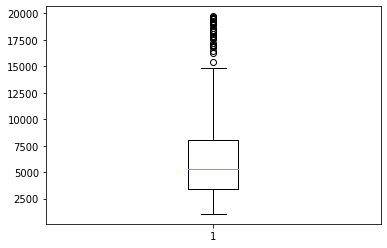

In [ ]:
#plt.boxplot(dataset["EmployeeNumber"])
plt.boxplot(data["MonthlyIncome"])
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca =PCA(n_components=30)
X2=pca.fit_transform(X)

In [ ]:
X2.shape

(441, 30)

In [ ]:
# Splitting the dataset into the Training set and Test set
from random import shuffle
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y,test_size=.2)


In [ ]:
X2.shape

(441, 30)

In [ ]:
X_test.shape

(89, 30)

In [ ]:
y


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(y)

[0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0
 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
X2.shape

(441, 30)

In [ ]:
X2

array([[ 9.06593390e+03,  1.65255860e+03,  4.23145378e+02, ...,
        -1.08008875e-01, -4.32191506e-01,  3.30078484e-01],
       [ 1.17411572e+04, -2.41854074e+03, -8.00960785e+02, ...,
         1.00547069e-01,  3.38397915e-01, -1.91981942e-01],
       [-2.97167459e+03, -5.00983483e+03,  7.31103023e+02, ...,
         5.18631017e-01,  4.28445748e-01, -1.64380926e-01],
       ...,
       [ 1.02080443e+04, -3.37340972e+03, -6.11652677e+02, ...,
         3.39953224e-01,  4.43637887e-02, -4.23847589e-02],
       [-6.70096689e+03, -1.28853204e+03, -1.40906336e+02, ...,
         6.70752562e-01,  3.51184829e-01, -1.67336415e-01],
       [ 1.20702571e+04, -4.79682100e+03,  5.76108148e+02, ...,
        -1.69652215e-01, -1.31626191e-01,  4.03229856e-02]])

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD




In [ ]:
opt = SGD(lr=0.001, momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model=Sequential()

In [ ]:
from tensorflow.python.keras.layers.core import Dropout
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=25,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))
model.add(Dropout(.2))
model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
mo=model.fit(X_train, y_train, batch_size = 32, epochs = 100,verbose=1,callbacks=EarlyStopping(patience=1))

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 1.5098 - accuracy: 0.3807
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 1.3235 - accuracy: 0.4688
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 1.7390 - accuracy: 0.5653
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 1.3293 - accuracy: 0.6165
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 1.1479 - accuracy: 0.6705
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 1.1855 - accuracy: 0.6875
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 1.2878 - accuracy: 0.6903
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 1.5812 - accuracy: 0.6960
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 1.3593 - accuracy: 0.7159
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 1.1739 - accuracy: 0.7386
Epoch 11/

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy_score(y_test, y_pred)


0.9775280898876404

making loss curv which represent loss function and epochs


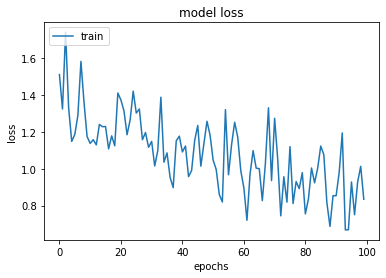

In [ ]:
plt.plot(mo.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')

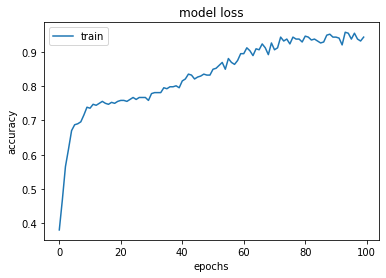

In [ ]:
plt.plot(mo.history['accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper left')

making convusion matrix which represent true_positive ,true_negative ,false_positive,false_negative


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[64  0]
 [ 2 23]]


In [ ]:
accuracy_score(y_test, y_pred)

0.9775280898876404

making roc curv which represent True positive and false positive

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
y_pred = model.predict(X_test).ravel()

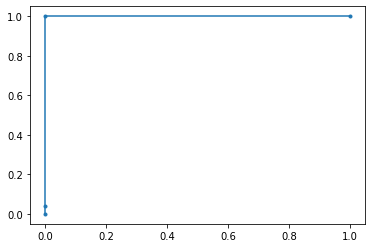

In [ ]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [ ]:
X_test.shape


(89, 30)

IndexError: ignored